# Estimation models with scaling laws and linear regression (Student version)

*Written by Marc Budinger, INSA Toulouse, France*

The estimation models calculate the component characteristics requested for their selection without requiring a detailed design. Scaling laws are particularly suitable for this purpose. This notebook illustrates the approach with IGBT component. 

*IGBT modules*
![IGBTmodule](https://raw.githubusercontent.com/SizingLab/sizing_course/main/class/Lab-watt_project/assets/images/IGBTmodule.PNG)

Validation of the obtained scaling laws is realized thanks linear regression on catalog data.  

The [following article](https://www.sciencedirect.com/science/article/pii/S1270963815003223) give more details and other models for power converters:  
>*Giraud, X., Budinger, M., Roboam, X., Piquet, H., Sartor, M., & Faucher, J. (2016). Optimal design of the Integrated Modular Power Electronics Cabinet. Aerospace Science and Technology, 48, 37-52.*  


## Scaling laws

#### Assumptions and notation
The IGBT chip or MOSFET are constituted of many arranged structures called "unit cells". The more the cells are provided, the lower the on-state voltage will be. The number of cells is assumed to be proportional to the current rating. We seek to establish the scaling laws for the same level of maximum voltage and the same technology. The thicknesses of the different layers (silicon, insulation, copper plate, ...) will therefore be assumed to be constant.

*Notation*: The x* scaling ratio of a given parameter is calculated as $x^*=\frac{x}{x_{ref}}$ where $x_{ref}$ is the parameter taken as the reference and $x$ the parameter under study.


#### Thermal resistance 
> Exercice : Propose a scaling law which links thermal resistance $R_{th}$ to rated current $I_0$. Estimate the thermal resistance for a 300 A component knowing the following reference component:   
$I_{0,ref} = 100 A$  
$R_{th_JC,ref} = 0.27 °C/W$  

In [1]:
# Student Work

## Validation with a data plot

We will compare the scaling law with a plot on catalog data. 

#### Import data

The first step is to import catalog data stored in a .csv file. We use for that functions from [Panda](https://pandas.pydata.org/index.html) package (with here an [introduction to panda](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html)). 

In [2]:
# Panda package Importation
import pandas as pd

# Read the .csv file with bearing data
path='https://raw.githubusercontent.com/SizingLab/sizing_course/main/class/Lab-watt_project/assets/data/'
df = pd.read_csv(path+'DataIGBT.csv', sep=';')
# Print the head (first lines of the file)
df.head()

,REF,Emax,I0,Eon_off,Vcc_ref,Vf0,Rf0,Qrr,Rth_jc
0,SKMy50GB063D,600,50,4.3,300,0.9,15.0,3.2,0.50
1,SKMy50GB063D,600,75,5.5,300,0.9,13.3,3.7,0.35
2,SKMy50GB063D,600,100,7.0,300,0.9,10.0,6.0,0.27
3,SKMy50GB063D,600,200,18.5,300,0.9,5.5,12.7,0.14
4,SKMy50GB063D,600,300,27.0,300,0.9,3.7,18.0,0.09


##### Plot data

We can now compare graphically the catalog data with scaling law:
- blue points, catalog data
- red line, scaling law
- red point, the reference for scalin law.

For the plot, we use the [matplotlib](https://matplotlib.org/) package.

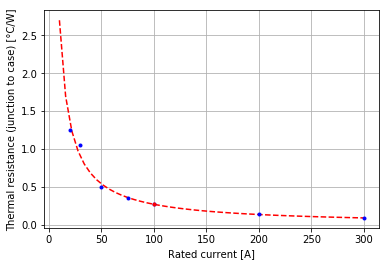

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Add 1 mm diameter point
I0=np.linspace(10, 300, num=50)

# Scaling law
Rth=R_th_jc_ref*(I0/I0_ref)**(-1)

# plot
h, ax = plt.subplots(1,1,sharex=True)
ax.plot(I0, Rth, '--r',df['I0'],df['Rth_jc'],'.b', I0_ref, R_th_jc_ref, '.r')
ax.set_ylabel('Thermal resistance (junction to case) [°C/W]')
ax.set_xlabel('Rated current [A]')
ax.grid()

#### Other scaling laws

The following table summarize the scaling laws which can be used for the sizing code.

##### Capacitor

|                | Scaling laws  | References |
| -------------- | --------------| -----------|
| Definition parameter : |       |            |
| Diameter | $D$   | 100 mm |
| Height   | $H$  | 155 mm| 
| Capacitance | $C^*= D^{*2}*H^{*}$ | $1000\mu F$ |
| Max voltage | $V^*=1$ | 800 V |
| Resistance ESR | $R_s^*=D^{*-2}$ | $3.2 m\Omega$ |  
| Thermal resistance |  $R_{th}^*=(D^{*2} H)^{*-1/3}$ | $3°C/W$ | 
| Wheight | $M^*=D^{*2} H^*$ | 1500 g | 



> Exercice: Calculate the characteristics of a 50mm diameter and 50mm height capacitor.  

In [3]:
# Student work


##### IGBT

|                | Scaling laws  | References |
| -------------- | --------------| -----------|
| Definition parameter : |       |            |
| Current | $I$ | $80 A$ |
|Maximum voltage | $V_{max}^* = 1$ | $900 V$ |
| Voltage drop | $V_0^*=1$ | $1 V$ | 
| Dynamic resistance | $R_0^*=I^{*-1}$ | 20 m${\Omega}$ |
| Commutation losses | $(E_{on}+E_{off})^*=I^* E^*$ | $8.2 mJ$ for $E=450 V$ |
| Thermal resistance | $R_{th_JC}^*=I^{*-1}$ | $0.30 °C/W$ |

##### Diode (Current evolution equal to IGBT current) 


|                | Scaling laws  | References |
| -------------- | --------------| -----------|
| Definition parameter : |       |            |
| Current | $I$ | $41 A$ |
| Maximum voltage | $V_{max}^* = 1$ | $900 V$ |
| Voltage drop | $V_0^*=1$ | $1 V$ | 
| Dynamic resistance | $R_0^*=I^{*-1}$ | $15 m\Omega$ |
| Commutation losses | $t_{rr}I_{RM}^{*}=I^*E^*$ | $17.2 mJ$ for $E=600 V$ |
| Thermal resistance | $R_{th_JC}^{*}=I^{*-1}$ | $0.47 °C/W$ |

